# TGAS #


[Описание полей](https://gaia.esac.esa.int/documentation//GDR1/Catalogue_consolidation/sec_cu1cva/sec_cu9gat.html)


In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
from urllib.request import urlretrieve,urlopen
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import os


# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('\r{}: [#] Begin program.'.format(datetime.strftime(datetime.now(),"[%Y.%m.%d-%H:%M:%S.%f]")))

	
#G0=25.525±0.003




Python version 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Numpy version 1.11.3
Pandas version 0.19.2
Matplotlib version 2.0.0
[2017.10.17-03:01:44.478201]: [#] Begin program.


In [2]:
time_format = "[%Y.%m.%d-%H:%M:%S.%f]"

def times():
    return str(datetime.strftime(datetime.now(), time_format))

In [3]:
def download_file(file):
    destination = file
    url = 'http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/' + file
    urlretrieve(url, destination)
    print('\r{}: [*] End download {}..'.format(times(), file))

In [4]:
%%time

for i in np.arange(16):
#for i in np.arange(5):
    n = '0'*(3 - len(str(i)))+str(i)
    file = 'TgasSource_000-000-'+n+'.csv'
    end_file = '.gz'
    if not os.path.isfile(file):
        print('{}: [-] File {} not found'.format(times(), file))
        if not os.path.isfile(file + end_file):
            print('{}: [-] Zip {} not found\n{}: [/] Start download {}..'.format(times(), file + end_file,time, file + end_file), end='')
            download_file(file + end_file)
        print('{}: [.] Begin unzip {}'.format(times(), file + end_file), end = '')
        os.system("gzip -d " + file + end_file)
        print('\r{}: [+] End unzip {}'.format(times(), file + end_file))
    else:
        print('{}: [+] File {} found'.format(times(), file))

[2017.10.17-03:01:44.721450]: [+] File TgasSource_000-000-000.csv found
[2017.10.17-03:01:44.722718]: [+] File TgasSource_000-000-001.csv found
[2017.10.17-03:01:44.723459]: [+] File TgasSource_000-000-002.csv found
[2017.10.17-03:01:44.724012]: [+] File TgasSource_000-000-003.csv found
[2017.10.17-03:01:44.724932]: [+] File TgasSource_000-000-004.csv found
[2017.10.17-03:01:44.725636]: [+] File TgasSource_000-000-005.csv found
[2017.10.17-03:01:44.726365]: [+] File TgasSource_000-000-006.csv found
[2017.10.17-03:01:44.727063]: [+] File TgasSource_000-000-007.csv found
[2017.10.17-03:01:44.727762]: [+] File TgasSource_000-000-008.csv found
[2017.10.17-03:01:44.728455]: [+] File TgasSource_000-000-009.csv found
[2017.10.17-03:01:44.729151]: [+] File TgasSource_000-000-010.csv found
[2017.10.17-03:01:44.729838]: [+] File TgasSource_000-000-011.csv found
[2017.10.17-03:01:44.730515]: [+] File TgasSource_000-000-012.csv found
[2017.10.17-03:01:44.731129]: [+] File TgasSource_000-000-013.cs

In [5]:
%%time

file = 'TgasSource_000-000-000.csv'
print('{}: [/] Loading {}..'.format(times(),file))
df0 = pd.read_csv(file)
l = len(df0)
print('{}: [/] len file = {}'.format(times(), l))


for i in np.arange(1,16):
#for i in np.arange(1,2):
    n = '0'*(3 - len(str(i)))+str(i)
    file = 'TgasSource_000-000-'+n+'.csv'
    print('{}: [/] Loading file {}..'.format(times(),file))
    df = pd.read_csv(file)
    l = len(df)
    df0 = df0.append(df)
    ldf = len(df0)
    df._clear_item_cache()
    print('{}: [/] len file = {}, len_df = {}'.format(times(), l, ldf))
print('{}: [/] End'.format(times()))

[2017.10.17-03:01:44.876438]: [/] Loading TgasSource_000-000-000.csv..
[2017.10.17-03:01:48.035774]: [/] len file = 134865
[2017.10.17-03:01:48.035981]: [/] Loading file TgasSource_000-000-001.csv..
[2017.10.17-03:01:51.402324]: [/] len file = 134865, len_df = 269730
[2017.10.17-03:01:51.402889]: [/] Loading file TgasSource_000-000-002.csv..
[2017.10.17-03:01:54.820016]: [/] len file = 134865, len_df = 404595
[2017.10.17-03:01:54.820226]: [/] Loading file TgasSource_000-000-003.csv..
[2017.10.17-03:01:58.121255]: [/] len file = 134865, len_df = 539460
[2017.10.17-03:01:58.121498]: [/] Loading file TgasSource_000-000-004.csv..
[2017.10.17-03:02:01.777169]: [/] len file = 134865, len_df = 674325
[2017.10.17-03:02:01.777392]: [/] Loading file TgasSource_000-000-005.csv..
[2017.10.17-03:02:05.619952]: [/] len file = 134865, len_df = 809190
[2017.10.17-03:02:05.620204]: [/] Loading file TgasSource_000-000-006.csv..
[2017.10.17-03:02:08.794639]: [/] len file = 134865, len_df = 944055
[2017.1

In [6]:
print(df0.dtypes)

hip                              float64
tycho2_id                         object
solution_id                        int64
source_id                          int64
random_index                       int64
ref_epoch                        float64
ra                               float64
ra_error                         float64
dec                              float64
dec_error                        float64
parallax                         float64
parallax_error                   float64
pmra                             float64
pmra_error                       float64
pmdec                            float64
pmdec_error                      float64
ra_dec_corr                      float64
ra_parallax_corr                 float64
ra_pmra_corr                     float64
ra_pmdec_corr                    float64
dec_parallax_corr                float64
dec_pmra_corr                    float64
dec_pmdec_corr                   float64
parallax_pmra_corr               float64
parallax_pmdec_c

In [7]:
%matplotlib inline
print(df0.shape)
print(df0.columns.values)

(2057050, 59)
['hip' 'tycho2_id' 'solution_id' 'source_id' 'random_index' 'ref_epoch'
 'ra' 'ra_error' 'dec' 'dec_error' 'parallax' 'parallax_error' 'pmra'
 'pmra_error' 'pmdec' 'pmdec_error' 'ra_dec_corr' 'ra_parallax_corr'
 'ra_pmra_corr' 'ra_pmdec_corr' 'dec_parallax_corr' 'dec_pmra_corr'
 'dec_pmdec_corr' 'parallax_pmra_corr' 'parallax_pmdec_corr'
 'pmra_pmdec_corr' 'astrometric_n_obs_al' 'astrometric_n_obs_ac'
 'astrometric_n_good_obs_al' 'astrometric_n_good_obs_ac'
 'astrometric_n_bad_obs_al' 'astrometric_n_bad_obs_ac'
 'astrometric_delta_q' 'astrometric_excess_noise'
 'astrometric_excess_noise_sig' 'astrometric_primary_flag'
 'astrometric_relegation_factor' 'astrometric_weight_al'
 'astrometric_weight_ac' 'astrometric_priors_used' 'matched_observations'
 'duplicated_source' 'scan_direction_strength_k1'
 'scan_direction_strength_k2' 'scan_direction_strength_k3'
 'scan_direction_strength_k4' 'scan_direction_mean_k1'
 'scan_direction_mean_k2' 'scan_direction_mean_k3' 'scan_directio

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057050 entries, 0 to 34074
Data columns (total 59 columns):
hip                              float64
tycho2_id                        object
solution_id                      int64
source_id                        int64
random_index                     int64
ref_epoch                        float64
ra                               float64
ra_error                         float64
dec                              float64
dec_error                        float64
parallax                         float64
parallax_error                   float64
pmra                             float64
pmra_error                       float64
pmdec                            float64
pmdec_error                      float64
ra_dec_corr                      float64
ra_parallax_corr                 float64
ra_pmra_corr                     float64
ra_pmdec_corr                    float64
dec_parallax_corr                float64
dec_pmra_corr                    fl

In [9]:
df0.head()

,hip,tycho2_id,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
0,13989.0,NaN,1635378410781933568,7627862074752,243619,2015.0,45.034330,0.305989,0.235392,0.218802,...,26.201841,77,1.031233e+07,10577.365273,7.991378,NOT_AVAILABLE,176.740413,-48.714422,42.641825,-16.121052
1,NaN,55-28-1,1635378410781933568,9277129363072,487238,2015.0,45.165007,2.583882,0.200068,1.197789,...,22.890602,62,9.495646e+05,1140.173576,10.580959,NOT_AVAILABLE,176.916420,-48.645004,42.761180,-16.193033
2,NaN,55-1191-1,1635378410781933568,13297218905216,1948952,2015.0,45.086155,0.213836,0.248825,0.180326,...,26.715704,60,8.178376e+05,1827.383676,10.743102,NOT_AVAILABLE,176.780400,-48.667845,42.697502,-16.123363
3,NaN,55-624-1,1635378410781933568,13469017597184,102321,2015.0,45.066542,0.276039,0.248211,0.200958,...,25.878560,61,6.020535e+05,905.877286,11.075682,NOT_AVAILABLE,176.760412,-48.682365,42.677791,-16.118216
4,NaN,55-849-1,1635378410781933568,15736760328576,409284,2015.0,45.136038,0.170697,0.335044,0.170130,...,26.755468,96,1.388122e+06,2826.428866,10.168701,NOT_AVAILABLE,176.739184,-48.572035,42.773370,-16.055481


http://simbad.u-strasbg.fr/simbad/sim-sam?Criteria=(ra<1.0&cat='gaia')&OutputMode=LIST&maxObject=20000&Output.format=ASCII
/bin/sh: 1: head./gaia_bv_ra/gaia_ra1.tsv: not found


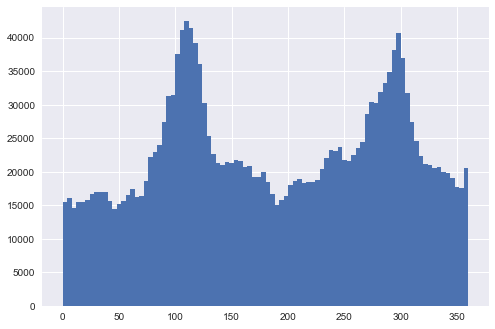

In [28]:
df0['ra'].apply(lambda x: round(x)).hist(bins=90)
destination = './gaia_bv_ra/gaia_ra'+str(int(1))+'.tsv'
url = "http://simbad.u-strasbg.fr/simbad/sim-sam?Criteria=(ra<1.0&cat='gaia')&OutputMode=LIST&maxObject=20000&Output.format=ASCII"  
print(url)
urlretrieve(url, destination)
            
!head./gaia_bv_ra/gaia_ra1.tsv

#url = 'http://simbad.u-strasbg.fr/simbad/sim-sam?CriteriaField=ra<1.0&ra>0.0&cat='gaia'&OutputMode=LIST&maxObject=20000'

In [11]:
df0['hip'].shape[0]-df0['hip'].value_counts(dropna=False).values[0],df0['tycho2_id'].shape[0]-df0['tycho2_id'].value_counts(dropna=False).values[0]

(93635, 1963415)

In [12]:
df0[df0['tycho2_id']!=np.NaN][df0['hip']!=np.NaN]

,hip,tycho2_id,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
0,13989.0,NaN,1635378410781933568,7627862074752,243619,2015.0,45.034330,0.305989,0.235392,0.218802,...,26.201841,77,1.031233e+07,10577.365273,7.991378,NOT_AVAILABLE,176.740413,-48.714422,42.641825,-16.121052
1,NaN,55-28-1,1635378410781933568,9277129363072,487238,2015.0,45.165007,2.583882,0.200068,1.197789,...,22.890602,62,9.495646e+05,1140.173576,10.580959,NOT_AVAILABLE,176.916420,-48.645004,42.761180,-16.193033
2,NaN,55-1191-1,1635378410781933568,13297218905216,1948952,2015.0,45.086155,0.213836,0.248825,0.180326,...,26.715704,60,8.178376e+05,1827.383676,10.743102,NOT_AVAILABLE,176.780400,-48.667845,42.697502,-16.123363
3,NaN,55-624-1,1635378410781933568,13469017597184,102321,2015.0,45.066542,0.276039,0.248211,0.200958,...,25.878560,61,6.020535e+05,905.877286,11.075682,NOT_AVAILABLE,176.760412,-48.682365,42.677791,-16.118216
4,NaN,55-849-1,1635378410781933568,15736760328576,409284,2015.0,45.136038,0.170697,0.335044,0.170130,...,26.755468,96,1.388122e+06,2826.428866,10.168701,NOT_AVAILABLE,176.739184,-48.572035,42.773370,-16.055481
5,NaN,55-182-1,1635378410781933568,16527034310784,204642,2015.0,45.141378,0.205008,0.359618,0.179848,...,25.163103,76,1.663843e+06,1381.577626,9.971989,NOT_AVAILABLE,176.718131,-48.551099,42.786150,-16.033536
6,NaN,55-867-1,1635378410781933568,16733192740608,540954,2015.0,45.152959,0.189524,0.386343,0.171880,...,26.265097,77,1.820999e+06,2755.908571,9.873996,NOT_AVAILABLE,176.701325,-48.524183,42.805789,-16.011356
7,NaN,55-72-1,1635378410781933568,16870631694208,1081909,2015.0,45.112779,0.206981,0.380844,0.150943,...,27.022827,87,9.671441e+05,601.801663,10.561042,NOT_AVAILABLE,176.665032,-48.556851,42.764140,-16.004886
8,NaN,55-912-1,1635378410781933568,26834955821312,589318,2015.0,45.010270,0.243576,0.351099,0.169345,...,25.522640,79,1.665821e+06,1233.428199,9.970699,NOT_AVAILABLE,176.589274,-48.651100,42.653112,-16.003369
9,NaN,48-1139-1,1635378410781933568,33260226885120,1178636,2015.0,44.974659,0.267911,0.473472,0.163531,...,24.041590,62,1.966821e+06,1184.173213,9.790358,NOT_AVAILABLE,176.419105,-48.591185,42.654932,-15.875932


In [13]:
%%time
import time,random
alll=df0.shape[0]

url = 'http://simbad.u-strasbg.fr/simbad/sim-sam?CriteriaField=ra>=0.0&ra<1.0&cat='gaia'&OutputMode=LIST&maxObject=20000'
t = 9788
while True:
    try:
        tt = t
        for r,d,e1,e2,gid in df0[['ra','dec','ra_error','dec_error','source_id']][tt:].values:
            destination = './gaia_bv/gaia'+str(int(gid))+'.tsv'
            url = "http://simbad.u-strasbg.fr/simbad/sim-id?Ident=gaia{}&output.format=ASCII&list.otypesel=off&obj.bibsel=off&list.bibsel=off&obj.pmsel=off&obj.cooN=off&list.cooN=off&list.idsel=off&obj.messel=off&obj.notesel=off&list.notesel=off".format(int(gid))
            #print(url)
            urlretrieve(url, destination)
            print('\r{}/{} {}% '.format(t,alll,round(t*100/alll),6),end='')
            time.sleep(1 + 0.2*random.random()+0.1*random.random())
            t+=1
    except:
        print('\rlol kek', t,end = '')
        
#        print('http://simbad.u-strasbg.fr/simbad/sim-coo?Coord={}:{}&Radius={}&Radius.unit=arcsec&CooFrame=FK5'\
#              .format(round(r,5),round(d,5),round((max(e1,e2)),5)))

SyntaxError: invalid syntax (<unknown>, line 4)

In [27]:
#!ls -al
#!head out_ra_dec.txt
#df0[['tycho2_id','solution_id','source_id','random_index','parallax','parallax_error']].head()
df_simbad=pd.read_csv('gaia9277129363072.tsv', skiprows = 8,sep='\s?:\s?',names = ['paramm','valuee'],engine='python')

In [15]:
df_simbad
print(df_simbad[df_simbad['paramm'] == 'Flux B']['valuee'].values,\
df_simbad[df_simbad['paramm'] == 'Flux V']['valuee'].values)


NameError: name 'df_simbad' is not defined

In [16]:

print(len(df0[df0['parallax']>0]['parallax']))
print(len(df0[df0['parallax']<0]['parallax']))
print(len(df0[df0['parallax']==0]['parallax']))

2026210
30840
0


In [17]:
df0[['astrometric_delta_q','matched_observations',
     'phot_g_n_obs','phot_g_mean_flux',
     'phot_g_mean_flux_error','phot_g_mean_mag',
     'phot_variable_flag']].describe()

,astrometric_delta_q,matched_observations,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag
count,93635.000000,2.057050e+06,2.057050e+06,2.057050e+06,2.057050e+06,2.057050e+06
mean,9.374476,1.588066e+01,1.269827e+02,1.675342e+06,2.553872e+03,1.081407e+01
std,99.919585,7.511576e+00,6.221384e+01,4.549677e+06,1.971542e+04,1.132381e+00
min,0.000038,4.000000e+00,1.100000e+01,3.067362e+02,1.049020e+00,4.395122e+00
25%,0.928779,1.000000e+01,8.200000e+01,3.588682e+05,3.703280e+02,1.019775e+01
50%,2.354002,1.500000e+01,1.150000e+02,6.241868e+05,1.028438e+03,1.103648e+01
75%,5.215794,1.900000e+01,1.560000e+02,1.351477e+06,2.121388e+03,1.163743e+01
max,20437.770000,2.230000e+02,1.866000e+03,2.830473e+08,4.356961e+06,1.930786e+01


In [18]:
"""pd.scatter_matrix(df0[['phot_g_n_obs',
     'phot_g_mean_flux','phot_g_mean_flux_error',
     'phot_g_mean_mag','phot_variable_flag']],
                  figsize=(15, 15), diagonal='kde');
                  """

"pd.scatter_matrix(df0[['phot_g_n_obs',\n     'phot_g_mean_flux','phot_g_mean_flux_error',\n     'phot_g_mean_mag','phot_variable_flag']],\n                  figsize=(15, 15), diagonal='kde');\n                  "

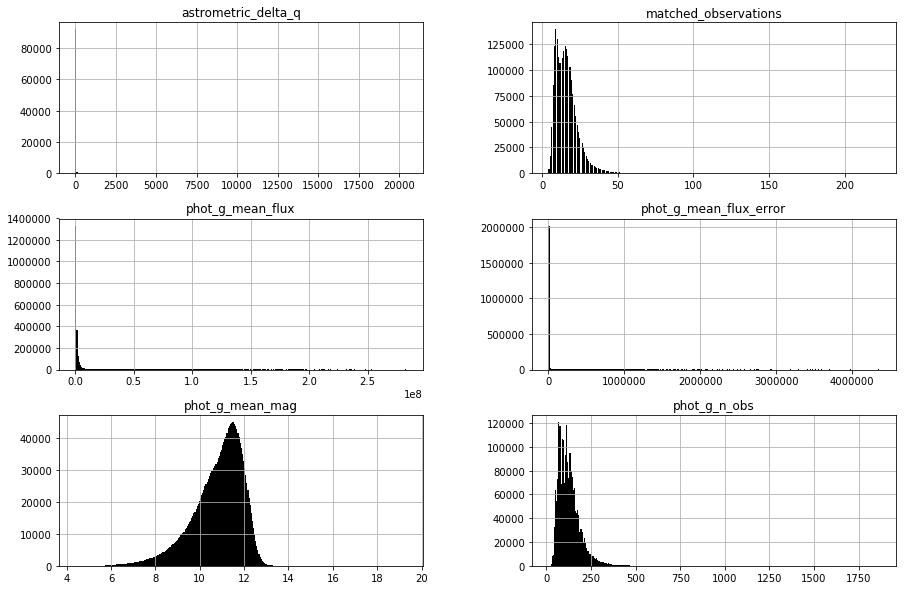

CPU times: user 6.07 s, sys: 40 ms, total: 6.11 s
Wall time: 6.15 s


In [19]:
%%time
df0[['astrometric_delta_q','matched_observations','phot_g_n_obs',
     'phot_g_mean_flux','phot_g_mean_flux_error',
     'phot_g_mean_mag','phot_variable_flag']].hist(
    color = 'k', bins = 300, figsize=(15,10))
plt.show()

In [20]:
%%time
df01 = (df0[df0['parallax']>0]['phot_g_mean_flux']+25.525+5+5*np.log10(df0[df0['parallax']>0]['parallax']))
df01.describe()
#df01.hist(color = 'k', bins = 100, figsize=(15,10))


CPU times: user 956 ms, sys: 392 ms, total: 1.35 s
Wall time: 1.33 s


In [21]:
print(len(df0[df0['parallax']>0]['parallax']))
print(len(df0[df0['parallax']<0]['parallax']))
print(len(df0[df0['parallax']==0]['parallax']))

2026210
30840
0


CPU times: user 10.1 s, sys: 88 ms, total: 10.2 s
Wall time: 10.2 s


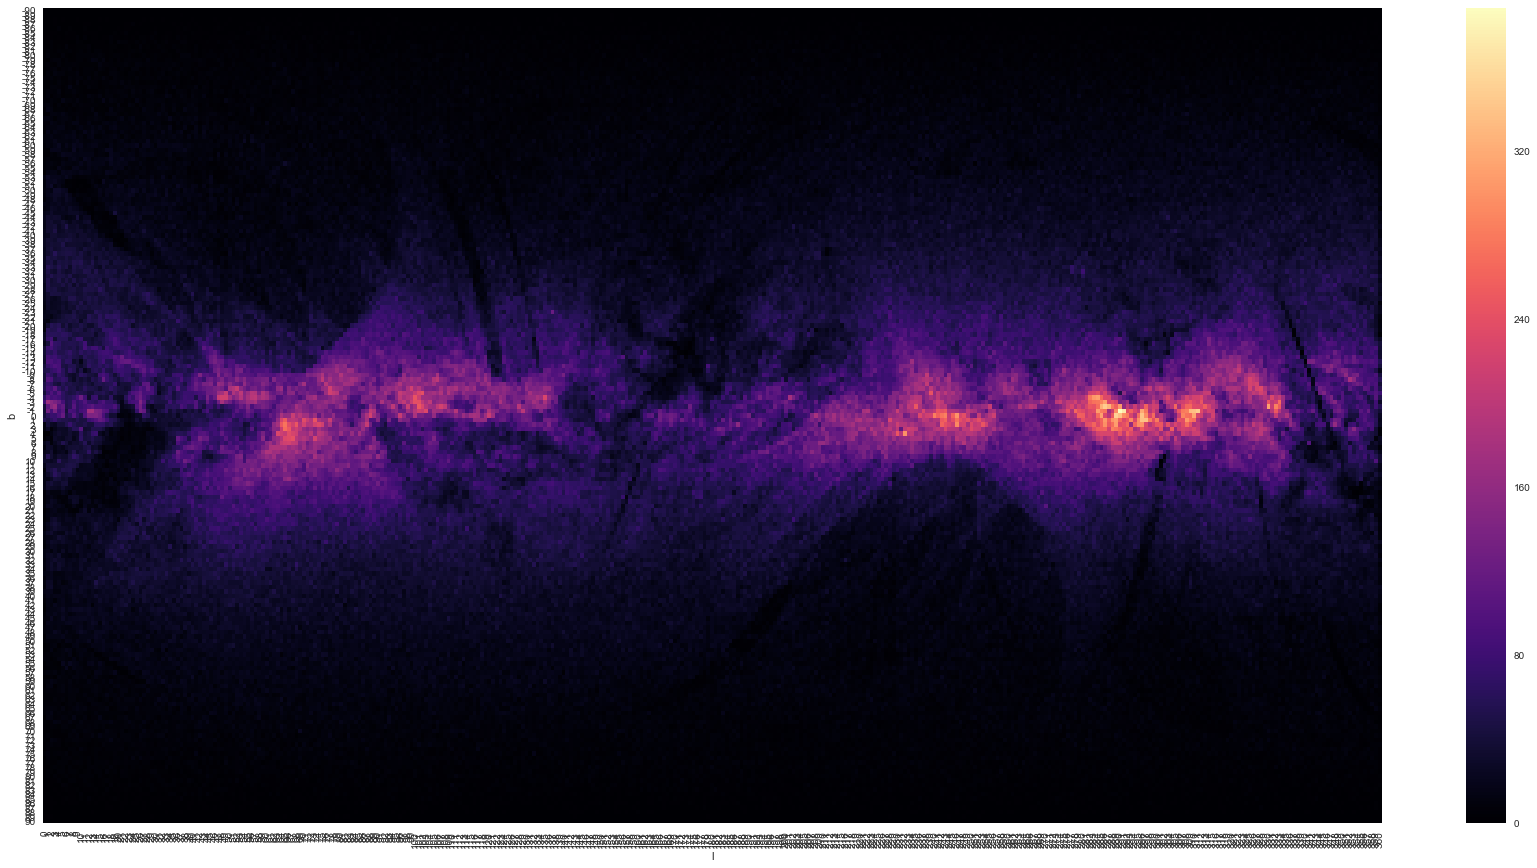

In [25]:
%%time
import seaborn as sns
a4_dims = (30, 15)
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(pd.crosstab(df0['b'].apply(lambda x: round(x)),df0['l'].apply(lambda x: round(x))),cmap='magma')

CPU times: user 10 s, sys: 112 ms, total: 10.2 s
Wall time: 10.2 s


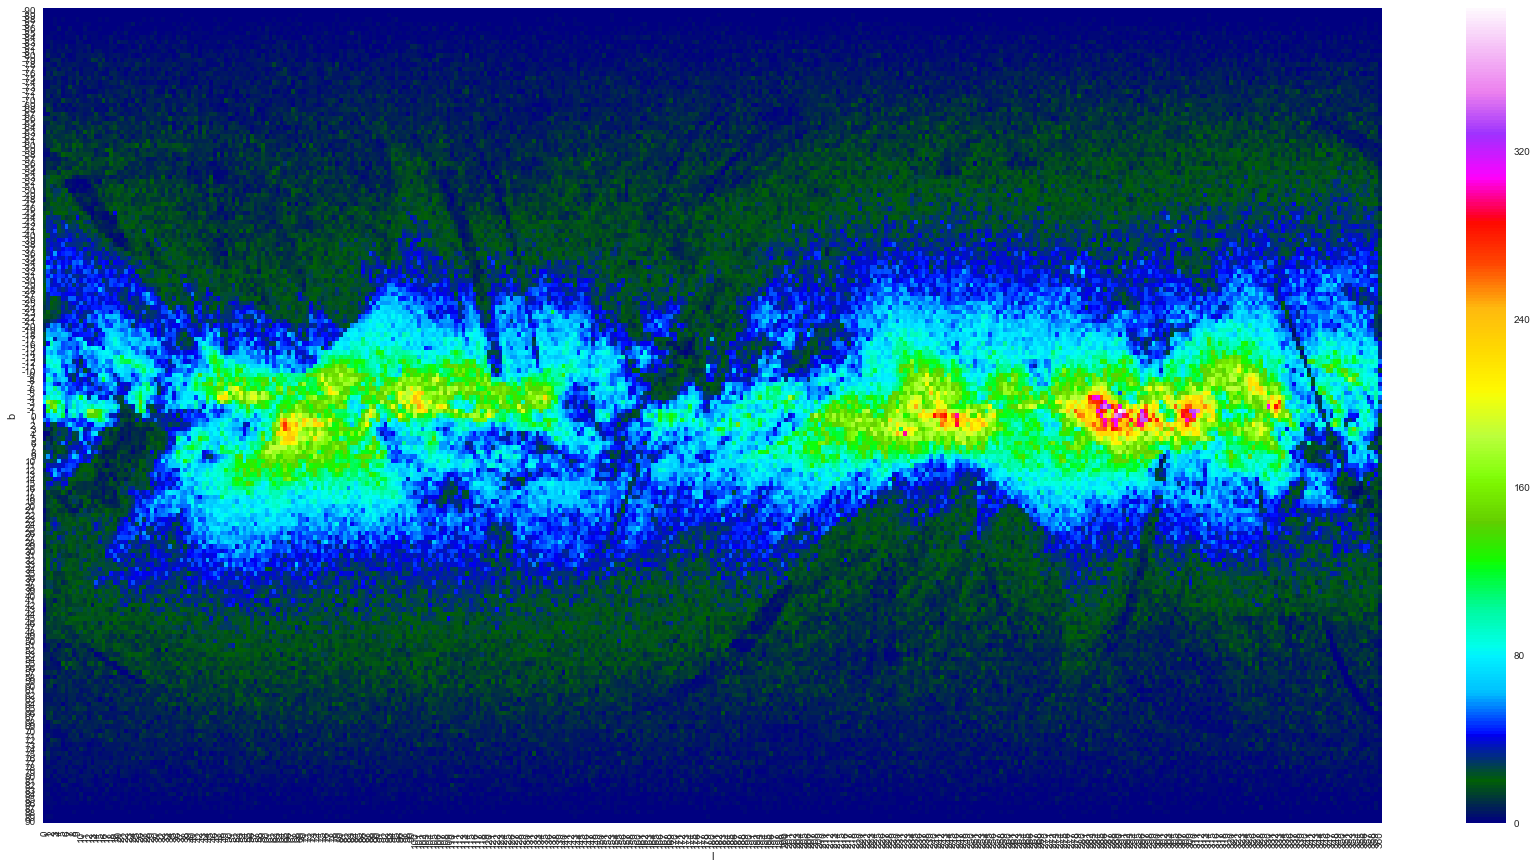

In [26]:
%%time
a4_dims = (30, 15)
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=a4_dims)#nipy_spectral,gist_ncar,jet,cubehelix,gist_stern,flag
sns.heatmap(pd.crosstab(df0['b'].apply(lambda x: round(x)),df0['l'].apply(lambda x: round(x))),cmap='gist_ncar',ax=ax)

http://simbad.u-strasbg.fr/simbad/sim-sam?CriteriaField=ra>=0& ra<1 & cat='gaia'&OutputMode=LIST&maxObject=20000